# Petit voyage en anomalie

## Récupération des données

In [14]:
from numpy import genfromtxt
convertfunc = lambda x: float(x[1:-1])
#namesColumn = "Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class"
#my_data = genfromtxt('/home/alexis/Documents/M1/S2/TER/creditcard.csv', delimiter=',', skip_header = 1, converters={30 : convertfunc})
#my_data = genfromtxt('G:\\documents\\TER\\TER\\creditcardfraud\\creditcard.csv', delimiter=',', skip_header = 1, converters={30 : convertfunc})
my_data = genfromtxt('C:\\Users\\Admin\\creditcard.csv', delimiter=',', skip_header = 1, converters={30 : convertfunc})

In [15]:
my_data

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
        -2.10530535e-02,  1.49620000e+02,  0.00000000e+00],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
         1.47241692e-02,  2.69000000e+00,  0.00000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.97518406e-02,  3.78660000e+02,  0.00000000e+00],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
        -2.65608286e-02,  6.78800000e+01,  0.00000000e+00],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.04532821e-01,  1.00000000e+01,  0.00000000e+00],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
         1.36489143e-02,  2.17000000e+02,  0.00000000e+00]])

In [16]:
type(my_data), my_data.ndim, my_data.shape

(numpy.ndarray, 2, (284807, 31))

In [17]:
print(my_data[0,29])
print(my_data[0,30])

149.62
0.0


In [18]:
nbLignes = len(my_data)
nbColonnes = len(my_data[0])
classes = my_data[:,30]
nbFraudes = (classes == 1).sum()
nbNonFraudes = nbLignes - nbFraudes
nbFraudes

492

In [19]:
namesColumn = ["Time","V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","V12","V13","V14","V15","V16","V17","V18","V19","V20","V21","V22","V23","V24","V25","V26","V27","V28","Amount"]

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import pandas as pd

## Création des tableaux fraude/non fraude et de l'échantillon de non fraude

In [21]:
fraudes = np.empty([nbFraudes, nbColonnes])
nonFraudes = np.empty([(nbNonFraudes), nbColonnes])
cF = 0
cNF = 0
for i in range(nbLignes):
    if(my_data[i,30] == 0):
        nonFraudes[cNF,:] = my_data[i,:]
        cNF += 1
    else:
        fraudes[cF,:] = my_data[i,:]
        cF += 1
print(type(fraudes), fraudes.ndim, fraudes.shape)
print(type(nonFraudes), nonFraudes.ndim, nonFraudes.shape)

<class 'numpy.ndarray'> 2 (492, 31)
<class 'numpy.ndarray'> 2 (284315, 31)


In [22]:
import random as rng
sizeSample = nbFraudes
nonFraudesSample = np.empty([(sizeSample), nbColonnes])
cNFS = 0
sampleNonFraudesIndex = rng.sample(list(np.arange(nbNonFraudes)), sizeSample)
sampleNonFraudesIndex
#for i in range(nbNonFraudes):
#    if(i in sampleNonFraudesIndex):
#        nonFraudesSample[cNFS,:] = nonFraudes[i,:]
#        cNFS += 1
for i in range(len(sampleNonFraudesIndex)):
    nonFraudesSample[i,:] = nonFraudes[sampleNonFraudesIndex[i],:]
print(type(nonFraudesSample), nonFraudesSample.ndim, nonFraudesSample.shape)

<class 'numpy.ndarray'> 2 (492, 31)


In [24]:
sizeData = sizeSample + nbFraudes
data = np.empty([sizeData, nbColonnes-1])
classesData = np.empty(sizeData)
for i in range(sizeData):
    if i < sizeSample:
        data[i,:] = nonFraudesSample[i,:-1]
        classesData[i] = nonFraudesSample[i,30]
    else:
        data[i,:] = fraudes[i-sizeSample,:-1]
        classesData[i] = fraudes[i-sizeSample,30]
        
print(type(data), data.ndim, data.shape)
print(data[0,:])
print(classesData)

<class 'numpy.ndarray'> 2 (984, 30)
[ 1.14915000e+05  2.17226560e+00 -1.29973605e+00 -2.12499374e+00
 -1.63467971e+00 -3.39901200e-01 -7.75945453e-01 -2.23301883e-01
 -4.05668570e-01 -2.21236741e+00  1.76595480e+00  8.85523937e-01
  2.40894355e-01  9.45921760e-01  9.72569505e-02 -1.46334140e+00
 -1.17047927e+00  5.55762840e-01 -1.15267014e-01  2.42793956e-01
 -2.25111086e-01  6.75235414e-02  5.52917863e-01 -5.31696724e-02
  7.60218109e-01  3.53590314e-01  4.93268381e-02 -6.13564293e-02
 -6.46898953e-02  9.46500000e+01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [25]:
sns.set()
df = pd.DataFrame(data, columns=namesColumn)
df['Class'] = classesData
#df['target'] = classes
#df['label'] = df.apply(lambda x: namesColumn[int(x.target)], axis=1)
df.head()

Time        V1        V2        V3        V4        V5        V6  \
0  114915.0  2.172266 -1.299736 -2.124994 -1.634680 -0.339901 -0.775945   
1  134078.0 -0.730913  1.391598  0.109961  0.012250  0.905844 -0.732397   
2   60547.0 -0.775805  0.699239  2.156244 -0.505637 -0.285467 -0.753034   
3  123837.0  0.265807  0.162190  1.360720 -0.382585 -0.154083  0.363256   
4  171137.0  2.291579 -0.426363 -2.390573 -0.840220  0.130728 -1.877251   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.223302 -0.405669 -2.212367  ...  0.067524  0.552918 -0.053170  0.760218   
1  1.181948 -0.582476 -0.055482  ... -0.234051 -0.431473  0.141937  1.029940   
2  0.425022  0.071048 -0.089360  ... -0.085608 -0.291283 -0.099654  0.393402   
3  0.204488 -0.013233  0.602107  ...  0.205246  0.894489  0.095838 -0.379068   
4  0.479951 -0.689735 -1.032068  ...  0.480707  1.485557 -0.218783  0.086144   

        V25       V26       V27       V28  Amount  Class  
0  0.353590  0.049327 -0.061356 -0.064690   94.65    0.0  
1 -0.794527  0.168207 -0.455918  0.113212    4.49    0.0  
2  0.298088  0.259466  0.167930  0.043202   26.77    0.0  
3 -0.976665 -0.491302  0.013858 -0.126121   47.38    0.0  
4  0.744979  0.303936 -0.092888 -0.094200   10.00    0.0  

[5 rows x 31 columns]

## Matrice de corrélation

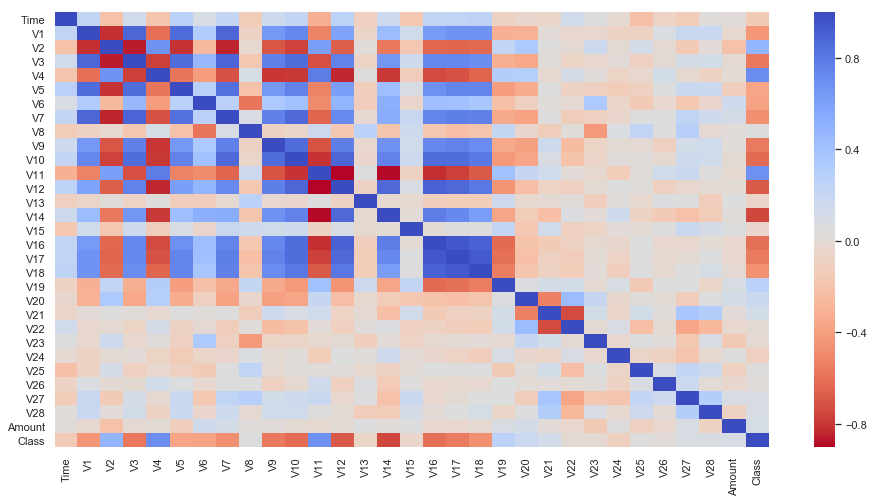

In [44]:
fig, ax = plt.subplots(figsize=(16, 8))
sub_sample_corr = df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', ax=ax)
plt.show()

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.

Ici, on remarque que V2, V4 et V11 sont corrélés positivement et V10, V12, V14 et V16 sont corrélés négativement à la classe.

## Toutes les colonnes en fonction de toutes les colonnes (quand c'est en fonction de la même on voit la densité)

G:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


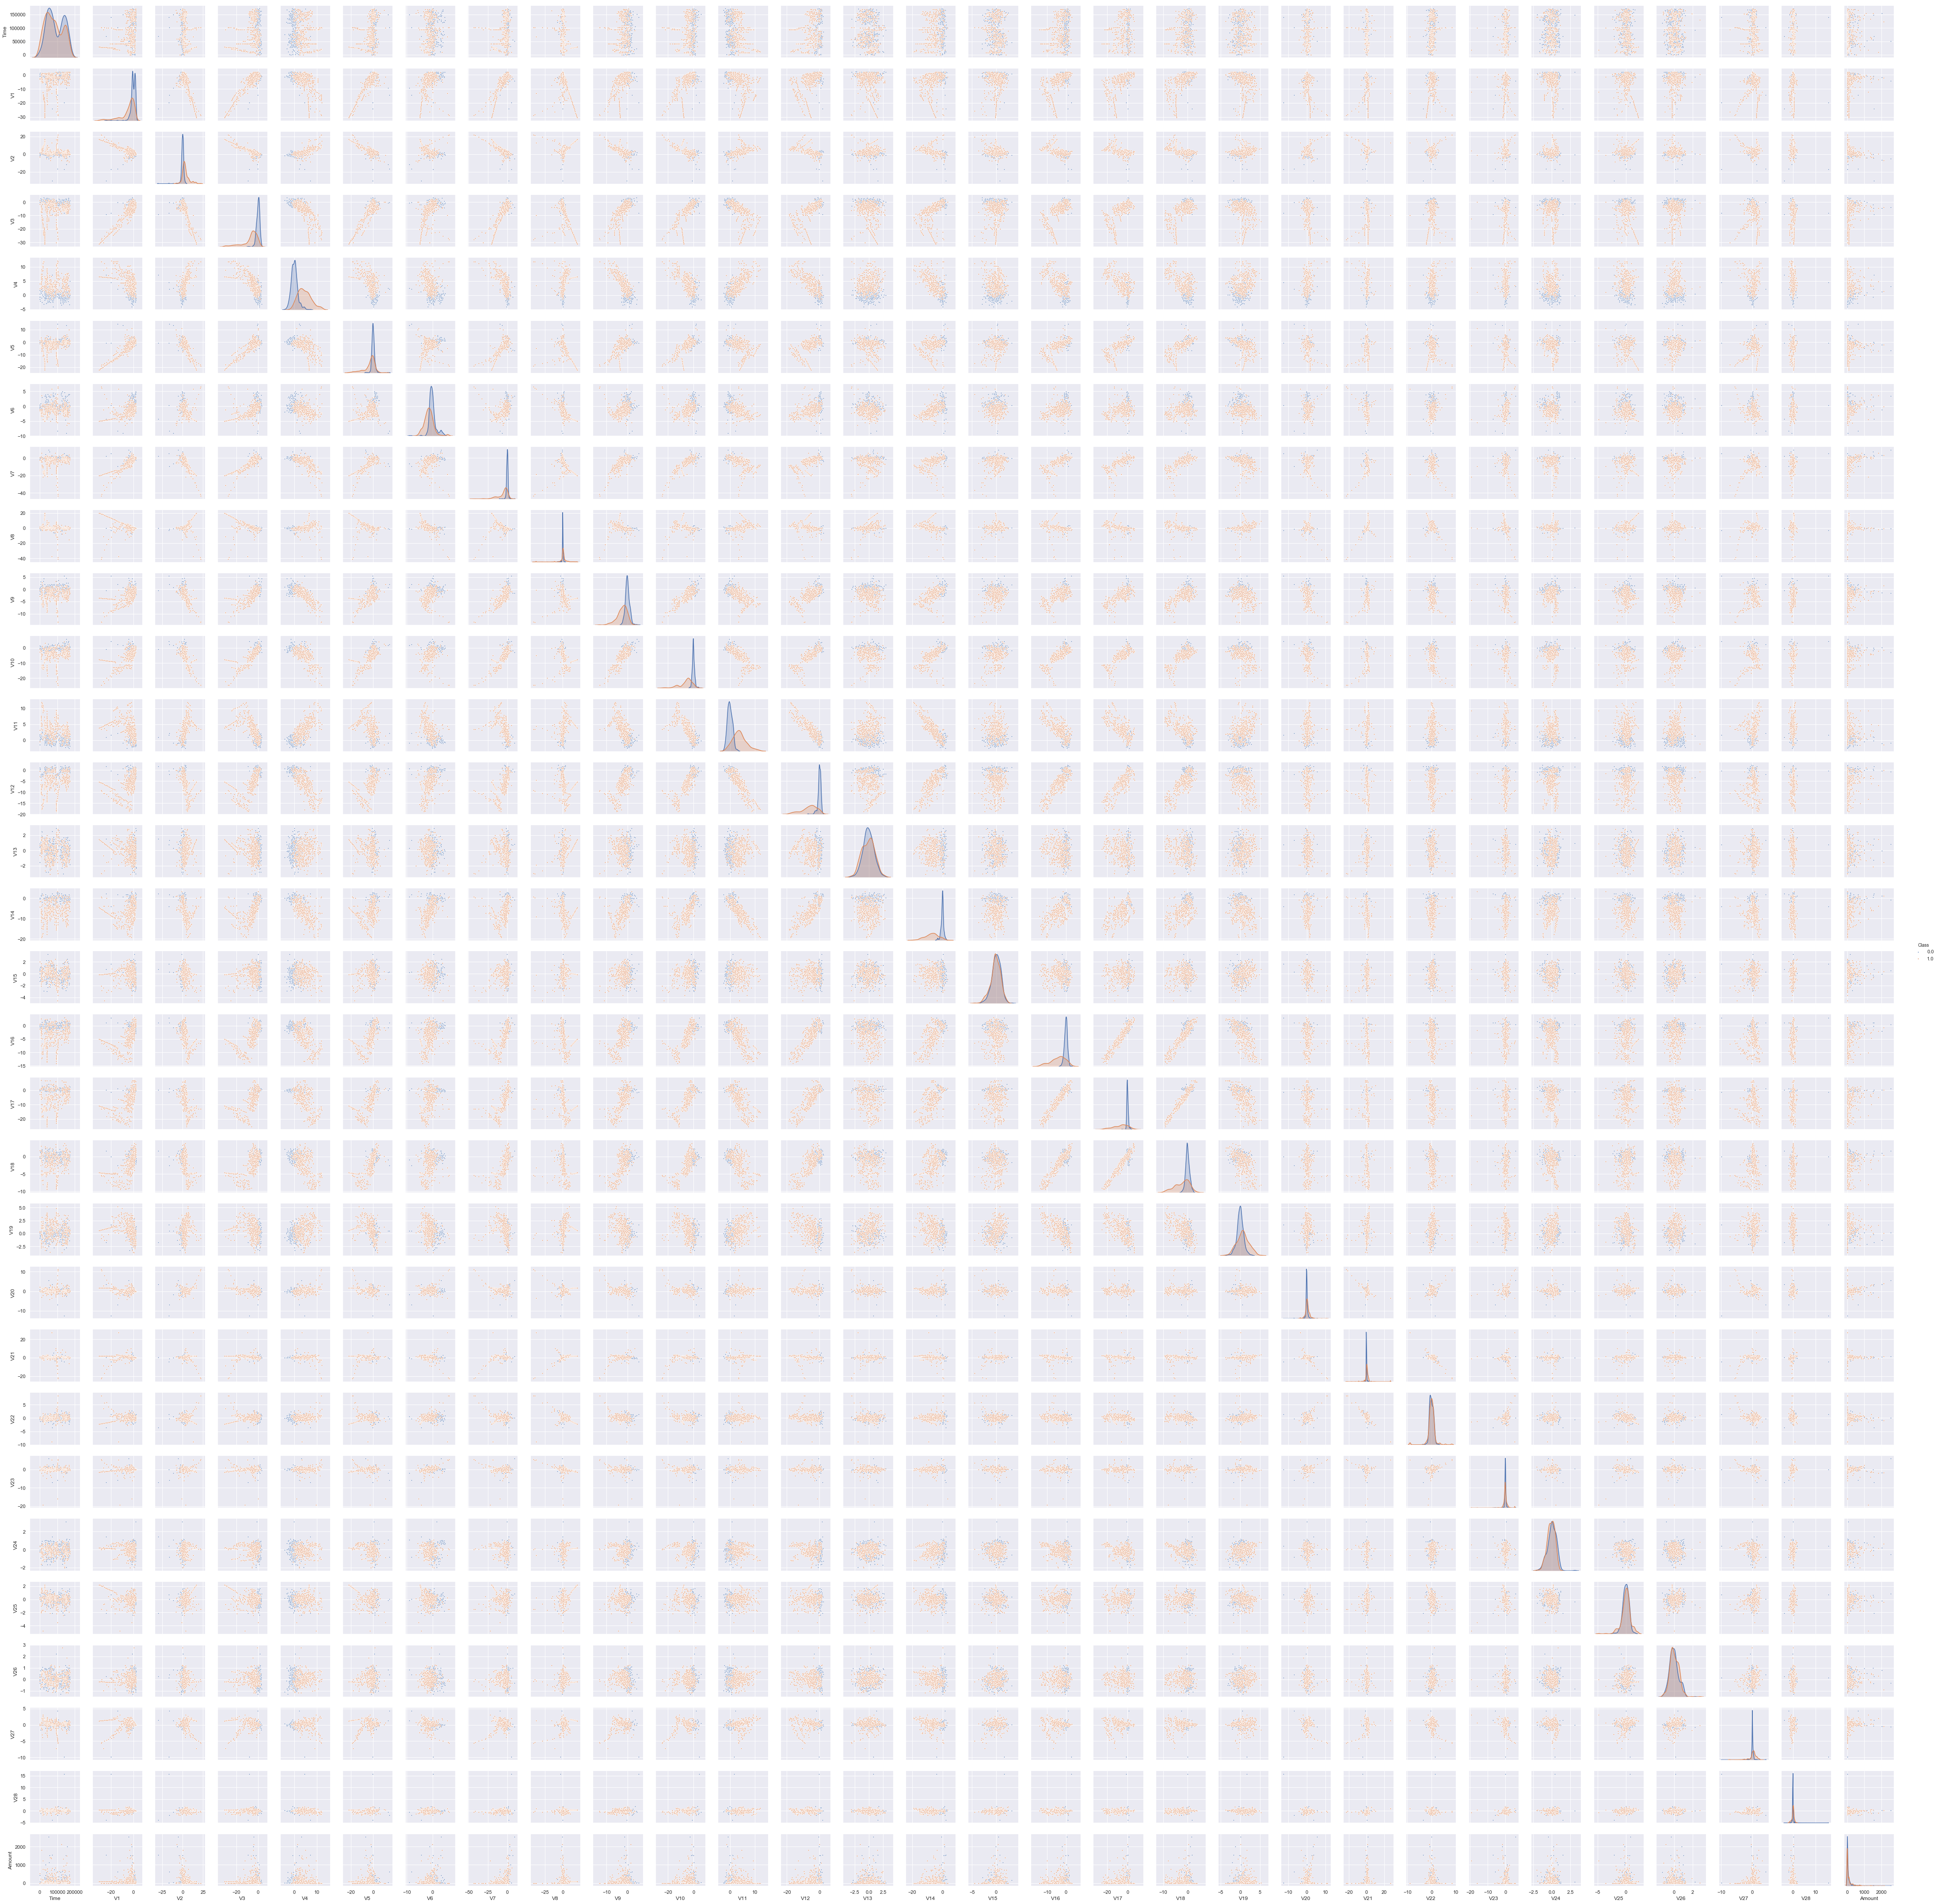

In [14]:
sns.pairplot(df, hue='Class', vars=namesColumn, height=2, plot_kws={"s": 7});

In [46]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

Nous sommes principalement interessés par le rappel, car il va nous permettre de repérer le plus de fraudes.
Accuracy = (TP+TN)/total
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

A cause de nos données non équilibré, beaucoup d'observations peuvent être préditent comme étant des faux négatifs, cad que nous avons prédit une transaction normal alors qu'il s'agissait d'une fraude. Le rappel va nous permettre de calculer ça.

Essayer d'améliorer le rappel tend à faire baiseer la précision. Cependant, dans notre cas, si nous prédisons qu'une transaction est frauduleuse alors que ce n'était pas le cas, ce n'est pas aussi problématique que l'inverse.

## Machine Learning : apprentissage supervisé avec un modèle Bayes naïf

In [56]:
# on sépare les données en 2 pour avoir un ensemble d'apprentissage et un ensemble de test
data_test = train_test_split(data, classesData
                                 , random_state=0
                                 , train_size=0.5)
data_train, data_test, target_train, target_test = data_test

clf = GaussianNB() #Model a suivre
clf.fit(data_train, target_train) #entrainement
result = clf.predict(data_test) #prediction

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
print(accuracy_score(result, target_test))
print(precision_recall_fscore_support(target_test, result, labels=[1]))

0.8597560975609756
(array([0.98843931]), array([0.71848739]), array([0.83211679]), array([238], dtype=int64))


In [61]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(target_test, result)
conf

array([[252,   2],
       [ 67, 171]], dtype=int64)

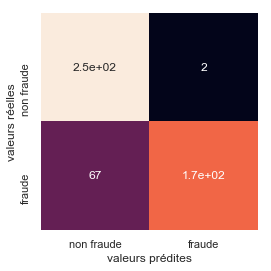

In [52]:
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

l'algo a répondu 67 fois "non fraude" alors que c'était des fraudes, et 5 fois "fraude" alors que c'était des non fraudes. Il a vu juste 420 fois. (85.3% de bonne réponse)

## Avec comme modèle k voisins

In [53]:
from sklearn import neighbors

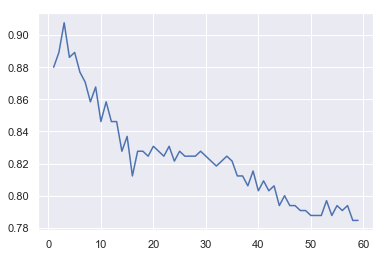

In [163]:
result = []
n_values = range(1,60)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    clf.fit(data_train, target_train)
    Z = clf.predict(data_test)
    score = accuracy_score(Z, target_test)
    result.append(score)

plt.plot(list(n_values), result)

max 62,8% de bonne réponse pour k=27; moins bien qu'avec bayes naïf

### test avec un sample composé que de non fraude

In [73]:
sizeSample = 10*nbFraudes
nonFraudesSample2 = np.empty([(sizeSample), nbColonnes])
cNFS = 0
sampleNonFraudesIndex = rng.sample(list(np.arange(nbNonFraudes)), sizeSample)
for i in range(nbNonFraudes):
    if(i in sampleNonFraudesIndex):
        nonFraudesSample2[cNFS,:] = nonFraudes[i,:]
        cNFS += 1
print(type(nonFraudesSample2), nonFraudesSample2.ndim, nonFraudesSample2.shape)

<class 'numpy.ndarray'> 2 (4920, 31)


0.9892276422764228
(array([0.]), array([0.]), array([0.]), array([0], dtype=int64))


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


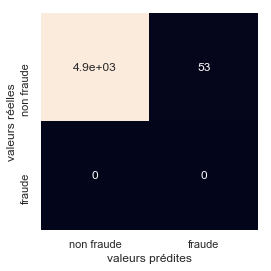

In [77]:
data_test2 = np.empty([sizeSample, nbColonnes-1])
target_test2 = np.empty(sizeSample)

data_test2[:,:] = nonFraudesSample2[:,:-1]
target_test2[:] = nonFraudesSample2[:,30]
    
clf = GaussianNB()
clf.fit(data_train, target_train)
result = clf.predict(data_test2)
#acc = accuracy_score(result, target_test2)
conf = confusion_matrix(target_test2, result)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(result, target_test2))
print(precision_recall_fscore_support(target_test2, result, labels=[1]))

## test avec 500 fraudes et 5000 non fraudes

In [83]:
sizeData2 = sizeSample + nbFraudes
data2 = np.empty([sizeData2, nbColonnes-1])
classesData2 = np.empty(sizeData2)
for i in range(sizeData2):
    if i < sizeSample:
        data2[i,:] = nonFraudesSample2[i,:-1]
        classesData2[i] = nonFraudesSample2[i,30]
    else:
        data2[i,:] = fraudes[i-sizeSample,:-1]
        classesData2[i] = fraudes[i-sizeSample,30]
        
print(type(data2), data2.ndim, data2.shape)
print(data2[0,:])
print(classesData2)

<class 'numpy.ndarray'> 2 (5412, 30)
[ 2.30000000e+01  1.05938712e+00 -1.75319187e-01  1.26612964e+00
  1.18610995e+00 -7.86001753e-01  5.78435276e-01 -7.67084276e-01
  4.01046149e-01  6.99499676e-01 -6.47375557e-02  1.04829249e+00
  1.00561836e+00 -5.42001579e-01 -3.99145025e-02 -2.18683248e-01
  4.47568220e-03 -1.93554039e-01  4.23879620e-02 -2.77833721e-01
 -1.78023367e-01  1.36762939e-02  2.13733610e-01  1.44618495e-02
  2.95085992e-03  2.94638015e-01 -3.95069505e-01  8.14611172e-02
  2.42203486e-02  1.29900000e+01]
[0. 0. 0. ... 1. 1. 1.]


## Avec colonne temps

0.9663710273466372
(array([0.88947368]), array([0.70711297]), array([0.78787879]), array([239], dtype=int64))


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


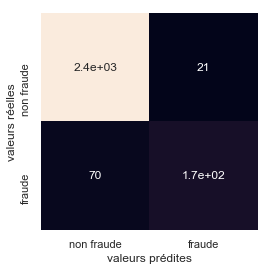

In [84]:
data_test2 = train_test_split(data2, classesData2
                                 , random_state=0
                                 , train_size=0.5)
data_train2, data_test2, target_train2, target_test2 = data_test2

clf = GaussianNB()
clf.fit(data_train2, target_train2)
result = clf.predict(data_test2)
#acc = accuracy_score(result, target_test2)
conf = confusion_matrix(target_test2, result)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(result, target_test2))
print(precision_recall_fscore_support(target_test2, result, labels=[1]))

## Sans colonne Temps

C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9630450849963045
(array([0.76029963]), array([0.84937238]), array([0.80237154]), array([239], dtype=int64))


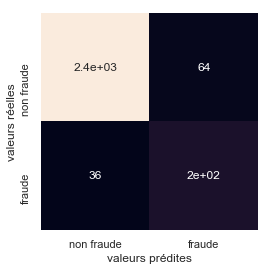

In [113]:
data2_noT = data2[:,1:]
namesColumn_noT = namesColumn[1:]

data_test2_noT = train_test_split(data2_noT, classesData2
                                 , random_state=0
                                 , train_size=0.5)
data_train2_noT, data_test2_noT, target_train2_noT, target_test2_noT = data_test2_noT

clf = GaussianNB()
clf.fit(data_train2_noT, target_train2_noT)
result = clf.predict(data_test2_noT)
#acc = accuracy_score(result, target_test2_noT)
conf = confusion_matrix(target_test2_noT, result)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(result, target_test2_noT))
print(precision_recall_fscore_support(target_test2_noT, result, labels=[1]))

## 2/3 training 1/3 test

In [114]:
from sklearn.metrics import precision_recall_fscore_support

0.9602463605823068
(array([0.73796791]), array([0.8625]), array([0.79538905]), array([160], dtype=int64))


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


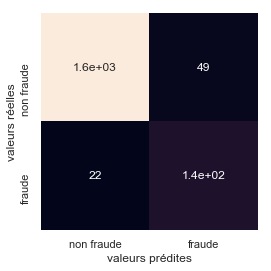

In [115]:
resultNB = []
data_test2 = train_test_split(data2_noT, classesData2
                                 , random_state=0
                                 , train_size=0.67) #test avec 2/3 d'apprentissage
data_train2, data_test2, target_train2, target_test2 = data_test2


clf = GaussianNB()
clf.fit(data_train2, target_train2)
resultNB = clf.predict(data_test2)
#acc = accuracy_score(resultNB, target_test2)


conf = confusion_matrix(target_test2, resultNB)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultNB, target_test2))
print(precision_recall_fscore_support(target_test2, resultNB, labels=[1]))

bilan : on choisi d'ignorer la colonne par la suite

## même tests avec l'échantillon 492/492

0.916923076923077
(array([0.96575342]), array([0.86503067]), array([0.91262136]), array([163], dtype=int64))


C:\Users\Admin\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


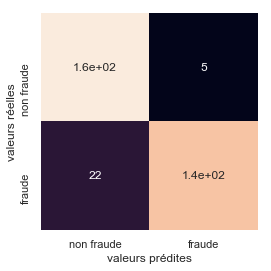

In [141]:
data_noT = data[:,1:]
data_test = train_test_split(data_noT, classesData
                                 , random_state=0
                                 , train_size=0.67)
data_train, data_test, target_train, target_test = data_test

clf = GaussianNB()
clf.fit(data_train, target_train)
resultNB = clf.predict(data_test)
#acc = accuracy_score(resultNB, target_test2)


conf = confusion_matrix(target_test, resultNB)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultNB, target_test))
print(precision_recall_fscore_support(target_test, resultNB, labels=[1]))

In [173]:
def drawConfMatCrossVal(clf):
    result = cross_val_predict(clf, data_noT, classesData, cv=10)
    conf_mat = confusion_matrix(classesData, result)
    print(conf_mat)
    sns.heatmap(conf_mat, square=True, annot=True, cbar=False
                , xticklabels=list(["non fraude", "fraude"])
                , yticklabels=list(["non fraude", "fraude"]))
    plt.xlabel('valeurs prédites')
    plt.ylabel('valeurs réelles');
    print(accuracy_score(result, classesData))
    print(precision_recall_fscore_support(classesData, result, labels=[1]))
    return result

## cross validation

In [109]:
11*492

5412

Accuracy: 0.9176 (+/- 0.0927)
Precision: 0.9617 (+/- 0.0626)
Rappel: 0.8697 (+/- 0.1628)
[[475  17]
 [ 64 428]]
0.9176829268292683
(array([0.96179775]), array([0.8699187]), array([0.9135539]), array([492], dtype=int64))


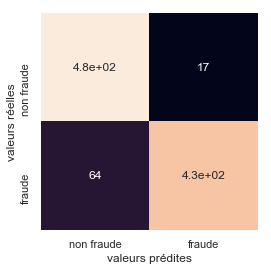

In [174]:
from sklearn.model_selection import cross_val_score

#scores = cross_val_score(clf, data2_noT, classesData2, cv=10)
#precision = cross_val_score(clf, data2_noT, classesData2, cv=10, scoring='precision')
#recall = cross_val_score(clf, data2_noT, classesData2, cv=10, scoring='recall')

clf = GaussianNB()
scores = cross_val_score(clf, data_noT, classesData, cv=10)
precision = cross_val_score(clf, data_noT, classesData, cv=10, scoring='precision')
recall = cross_val_score(clf, data_noT, classesData, cv=10, scoring='recall')
#scores  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Precision: %0.4f (+/- %0.4f)" % (precision.mean(), precision.std() * 2))
print("Rappel: %0.4f (+/- %0.4f)" % (recall.mean(), recall.std() * 2))

# fig, ax = plt.subplots()
# the histogram of the data
# n, bins, patches = ax.hist(scores)

resultNB = drawConfMatCrossVal(clf)

Accuracy: 0.9236 (+/- 0.0888)
Precision: 0.9692 (+/- 0.0457)
Rappel: 0.8757 (+/- 0.1814)
[[478  14]
 [ 61 431]]
0.9237804878048781
(array([0.96853933]), array([0.87601626]), array([0.91995731]), array([492], dtype=int64))


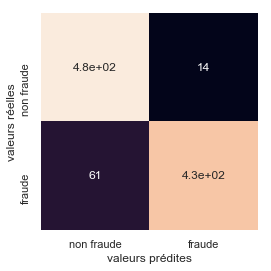

In [175]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf, data_noT, classesData, cv=10)
precision = cross_val_score(clf, data_noT, classesData, cv=10, scoring='precision')
recall = cross_val_score(clf, data_noT, classesData, cv=10, scoring='recall')
#scores  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Precision: %0.4f (+/- %0.4f)" % (precision.mean(), precision.std() * 2))
print("Rappel: %0.4f (+/- %0.4f)" % (recall.mean(), recall.std() * 2))

# fig, ax = plt.subplots()
# the histogram of the data
# n, bins, patches = ax.hist(scores)

resultKN = drawConfMatCrossVal(clf)

Accuracy: 0.9216 (+/- 0.0737)
Precision: 0.9332 (+/- 0.0363)
Rappel: 0.9124 (+/- 0.1356)
[[458  34]
 [ 43 449]]
0.9217479674796748
(array([0.92960663]), array([0.91260163]), array([0.92102564]), array([492], dtype=int64))


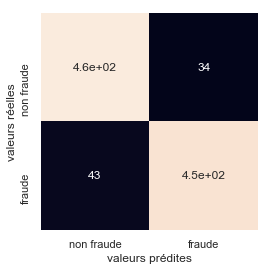

In [176]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, data_noT, classesData, cv=10)
precision = cross_val_score(clf, data_noT, classesData, cv=10, scoring='precision')
recall = cross_val_score(clf, data_noT, classesData, cv=10, scoring='recall')
#scores  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Precision: %0.4f (+/- %0.4f)" % (precision.mean(), precision.std() * 2))
print("Rappel: %0.4f (+/- %0.4f)" % (recall.mean(), recall.std() * 2))

# fig, ax = plt.subplots()
# the histogram of the data
# n, bins, patches = ax.hist(scores)

resultDT = drawConfMatCrossVal(clf)

Accuracy: 0.9440 (+/- 0.0844)
Precision: 0.9883 (+/- 0.0235)
Rappel: 0.8981 (+/- 0.1583)
[[487   5]
 [ 50 442]]
0.9441056910569106
(array([0.98881432]), array([0.89837398]), array([0.94142705]), array([492], dtype=int64))


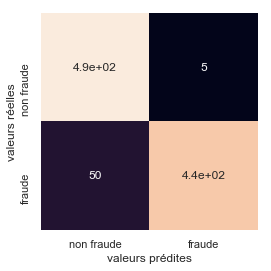

In [177]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0)
scores = cross_val_score(clf, data_noT, classesData, cv=10)
precision = cross_val_score(clf, data_noT, classesData, cv=10, scoring='precision')
recall = cross_val_score(clf, data_noT, classesData, cv=10, scoring='recall')
#scores  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Precision: %0.4f (+/- %0.4f)" % (precision.mean(), precision.std() * 2))
print("Rappel: %0.4f (+/- %0.4f)" % (recall.mean(), recall.std() * 2))

# fig, ax = plt.subplots()
# the histogram of the data
# n, bins, patches = ax.hist(scores)

resultRF = drawConfMatCrossVal(clf)

In [198]:
resultVoting = [round((a+b+3*c+2*d)/7) for a, b, c, d in zip(resultNB, resultKN, resultDT, resultRF)]

0.9420731707317073
(array([0.97802198]), array([0.90447154]), array([0.93980993]), array([492], dtype=int64))


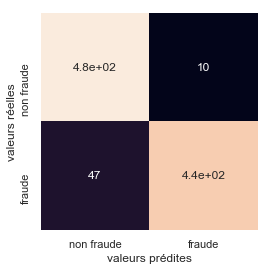

In [199]:
conf = confusion_matrix(classesData, resultVoting)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultVoting, classesData))
print(precision_recall_fscore_support(classesData, resultVoting, labels=[1]))

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict

Accuracy: 0.9390 (+/- 0.0697)
Precision: 0.9718 (+/- 0.0316)
Rappel: 0.9045 (+/- 0.1383)
[[479  13]
 [ 47 445]]
0.9390243902439024
(array([0.97161572]), array([0.90447154]), array([0.93684211]), array([492], dtype=int64))


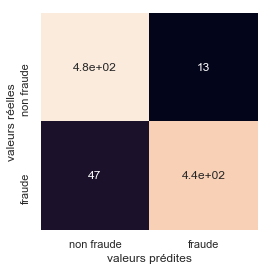

In [158]:
clf = LogisticRegression(solver='lbfgs', max_iter=1000)
scores = cross_val_score(clf, data_noT, classesData, cv=10)
precision = cross_val_score(clf, data_noT, classesData, cv=10, scoring='precision')
recall = cross_val_score(clf, data_noT, classesData, cv=10, scoring='recall')
#scores  
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))
print("Precision: %0.4f (+/- %0.4f)" % (precision.mean(), precision.std() * 2))
print("Rappel: %0.4f (+/- %0.4f)" % (recall.mean(), recall.std() * 2))

# fig, ax = plt.subplots()
# the histogram of the data
# n, bins, patches = ax.hist(scores)

drawConfMatCrossVal(clf)

# Ancien tests

## Arbre de décision

In [116]:
from sklearn import tree

0.9736842105263158
(array([0.85534591]), array([0.85]), array([0.85266458]), array([160], dtype=int64))
[1. 0. 0. ... 0. 0. 0.]


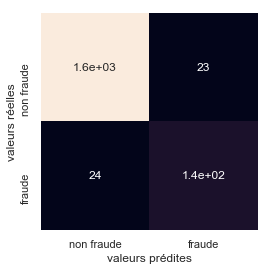

In [149]:
resultDT = []
clf = tree.DecisionTreeClassifier()
clf.fit(data_train2, target_train2)
resultDT = clf.predict(data_test2)
#acc = accuracy_score(resultDT, target_test2)
conf = confusion_matrix(target_test2, resultDT)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultDT, target_test2))
print(precision_recall_fscore_support(target_test2, resultDT, labels=[1]))

## Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

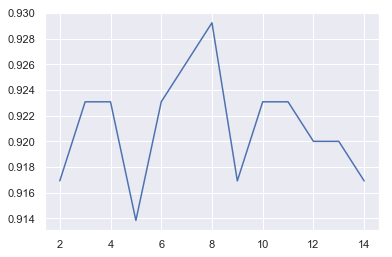

In [171]:
result = []
n_values = range(2,15)
for n in n_values:
    clf = RandomForestClassifier(n_estimators=100, max_depth=n, random_state=0)
    clf.fit(data_train, target_train)
    Z = clf.predict(data_test)
    score = accuracy_score(Z, target_test)
    result.append(score)

plt.plot(list(n_values), result)

0.9837625979843225
(array([0.98518519]), array([0.83125]), array([0.90169492]), array([160], dtype=int64))


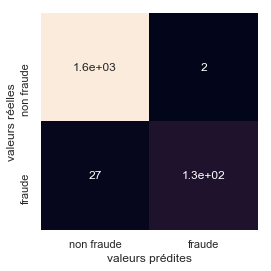

In [120]:
resultRF = []
clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
clf.fit(data_train2, target_train2)
resultRF = clf.predict(data_test2)
#acc = accuracy_score(resultRF, target_test2)
conf = confusion_matrix(target_test2, resultRF)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultRF, target_test2))
print(precision_recall_fscore_support(target_test2, resultRF, labels=[1]))

## Bagging

In [121]:
resultBagging = [round((a+1.1*b+1.2*c)/3.3) for a, b, c in zip(resultNB, resultDT, resultRF)]

0.9820828667413214
(array([0.95070423]), array([0.84375]), array([0.89403974]), array([160], dtype=int64))


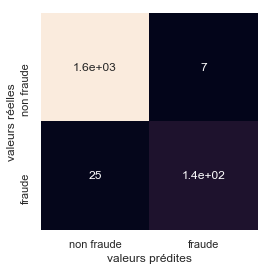

In [122]:
#acc = accuracy_score(resultBagging, target_test2)
conf = confusion_matrix(target_test2, resultBagging)
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(["non fraude", "fraude"])
            , yticklabels=list(["non fraude", "fraude"]))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');
print(accuracy_score(resultBagging, target_test2))
print(precision_recall_fscore_support(target_test2, resultBagging, labels=[1]))

A faire :
Validation croisée (~OK)

arbre de décision

random forest

Bagging (lancer plusieurs methodes en parallèle et prendre la/les meilleures via votes (pondérée par l'indice de confiance))

Aller sur Kagle pour voir ce qu'on fait les autres

enlever attribut temps et relancer algos (OK)



Présentation : préciser étapes de travail:
préciser prob de dep
difficultés (déséquilibre, vaste domaine --> détection de fraude)
passage du R au python
parler du cas perso (cas bancaire anonymisé, connait les fraudes, faire fouille de données, besoin sampling)
algo machine learning
parler des scatterplots et matrices de confusion
Jupyter : plus facile à rajouter contenu + pour expliquer aux autres
      
                                                                                        
30/04-07/05
30 Avril CT Web Service
03 Mai CT IA